In [15]:
import math
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, expon, wilcoxon
import statsmodels.api as sm
from scipy.stats import ttest_ind, ttest_ind_from_stats

from statsmodels.stats import weightstats as stests

plt.style.use('ggplot')

В файле test_2 лежит результат теста, который был нацелен на увеличение суммы чека клиента. Изучите результаты теста и сделайте вывод , увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

H0 - сумма чека не изменилась

H1 - чек увеличился


a = 0.05

In [2]:
df = pd.read_csv('/home/marina/Documents/data_analysis/test_2.csv')

In [3]:
df

,group,client_id,avg_sum
0,test,1,156.686451
1,test,2,342.625859
2,test,3,79.712120
3,test,4,493.110807
4,test,5,124.135016
...,...,...,...
595,control,596,209.075972
596,control,597,57.990291
597,control,598,42.577037
598,control,599,178.320097


In [69]:
control_df = df[df.group == 'control']
test_df = df[df.group == 'test']

control_df.avg_sum.median(), test_df.avg_sum.median()

(104.72763550398423, 132.65585525843812)

Мы видим, что данные распределены ненормально. Для такого случая подойдет критерий Манна-Уитни.

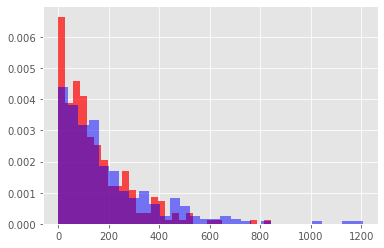

In [35]:
plt.hist(x=control_df['avg_sum'], bins=30, density=True, color='red', alpha=0.7)
plt.hist(x=test_df['avg_sum'], bins=30, density=True, color='blue', alpha=0.5)
plt.show()

In [36]:
len(test_df), len(control_df)

(306, 294)

In [70]:
# Сравняем размеры выборок
test = test_df.avg_sum.sort_values().values
test = test[6:300]
control = control_df.avg_sum.values

In [71]:
wilcoxon(control, test)


WilcoxonResult(statistic=16929.0, pvalue=0.0011212414468655134)

p-value < a, отвергаем H0, то есть сумма чека изменилась